In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
from matplotlib import colors as mpl_colors
import pandas as pd
import polars as pl
import seaborn as sns
from teeplot import teeplot as tp

from pylib.viz._size_fixation_heatmap import size_fixation_heatmap


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-10-13T18:56:06.170822+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

polars    : 1.9.0
teeplot   : 1.1.3
pandas    : 2.2.3
seaborn   : 0.13.2
matplotlib: 3.9.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "wse-denovo-spatial2d-traits"
teeplot_subdir


'wse-denovo-spatial2d-traits'

## Prep Data


In [5]:
dfxs = pd.read_parquet("https://osf.io/eacvu/download")
display(dfxs.describe()), display(dfxs.head()), display(dfxs.tail());


,group,trait value,replicate,population size,available beneficial mutations,fixation probability
count,7.174548e+06,7174656.0,7.174656e+06,7.174656e+06,7.174656e+06,7.174656e+06
mean,2.452487e+05,0.5,8.698788e+18,6.286069e+03,1.000000e+01,5.000000e-01
std,1.567677e+05,0.5,5.665521e+18,9.114411e+05,4.760953e+00,4.999853e-01
min,0.000000e+00,0.0,5.629117e+16,2.560000e+02,2.000000e+00,0.000000e+00
25%,1.065180e+05,0.0,3.120322e+18,2.560000e+02,6.000000e+00,0.000000e+00
50%,2.325010e+05,0.5,7.266672e+18,2.560000e+02,1.100000e+01,5.000000e-01
75%,3.819710e+05,1.0,1.594906e+19,2.560000e+02,1.400000e+01,1.000000e+00
max,5.314400e+05,1.0,1.837066e+19,1.908480e+08,1.600000e+01,1.000000e+00


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
0,313.0,1,16718381540940362211,256,2,0.0,hypermutator
1,207649.0,1,16718381540940362211,256,2,0.0,hypermutator
2,181741.0,1,16718381540940362211,256,2,0.0,hypermutator
3,247212.0,0,16718381540940362211,256,2,1.0,normomutator
4,63165.0,0,16718381540940362211,256,2,1.0,normomutator


,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype
7174651,NaN,1,9356033662109735921,190848000,16,0.000092,hypermutator
7174652,NaN,0,10871965234276577008,190848000,16,0.000000,normomutator
7174653,NaN,1,10871965234276577008,190848000,16,1.000000,hypermutator
7174654,NaN,1,4042916190423403108,190848000,12,0.000094,hypermutator
7174655,NaN,0,4042916190423403108,190848000,12,0.999906,normomutator


In [6]:
apn = dfxs["population size"].min()  # agents per node
apn


np.uint64(256)

## Size Fixation Curves


teeplots/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/col=available-beneficial-mutations+errorbar=sd+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


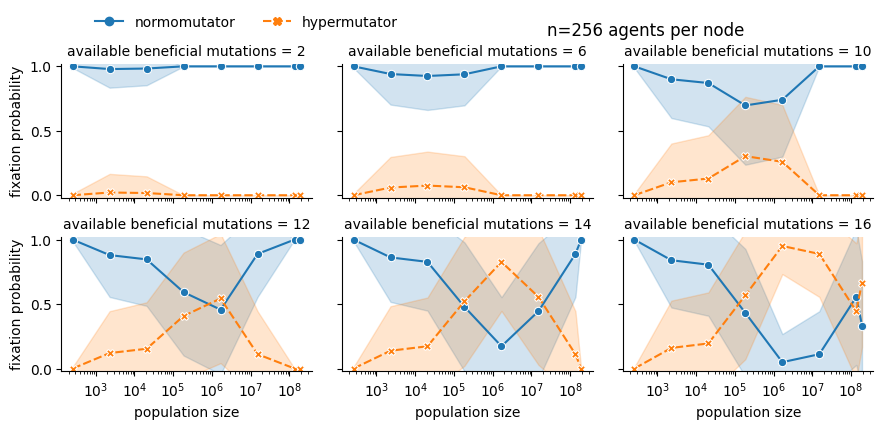

teeplots/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/col=available-beneficial-mutations+errorbar=se+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


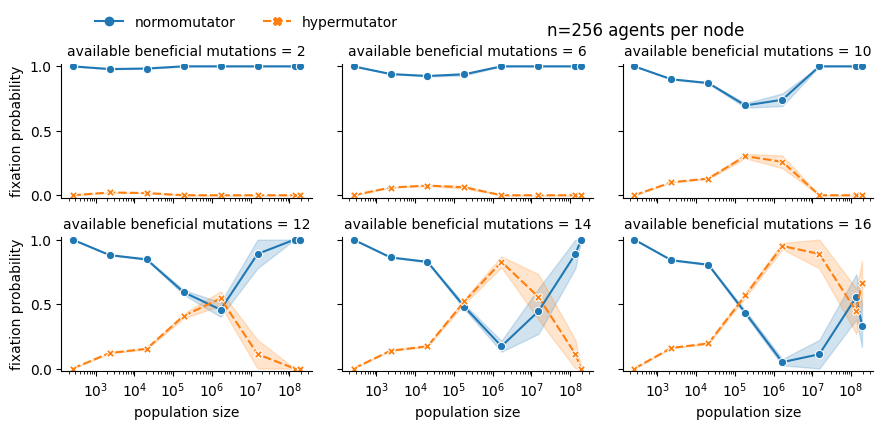

teeplots/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/col=available-beneficial-mutations+errorbar=ci+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


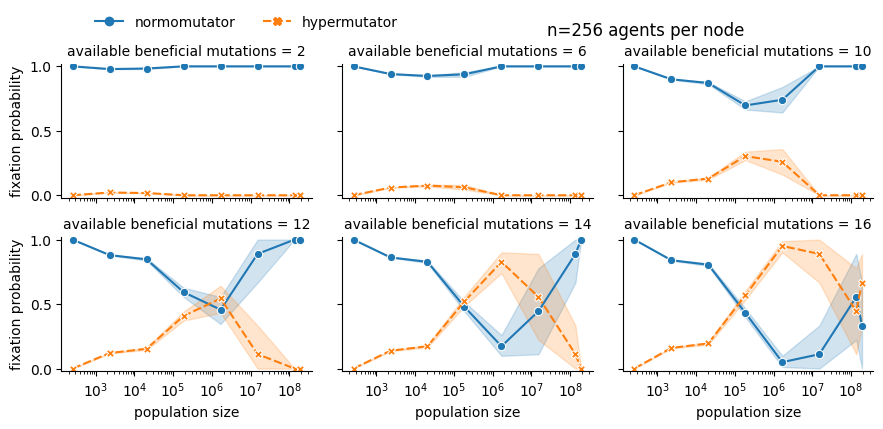

teeplots/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/col=available-beneficial-mutations+hue=genotype+kind=line+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


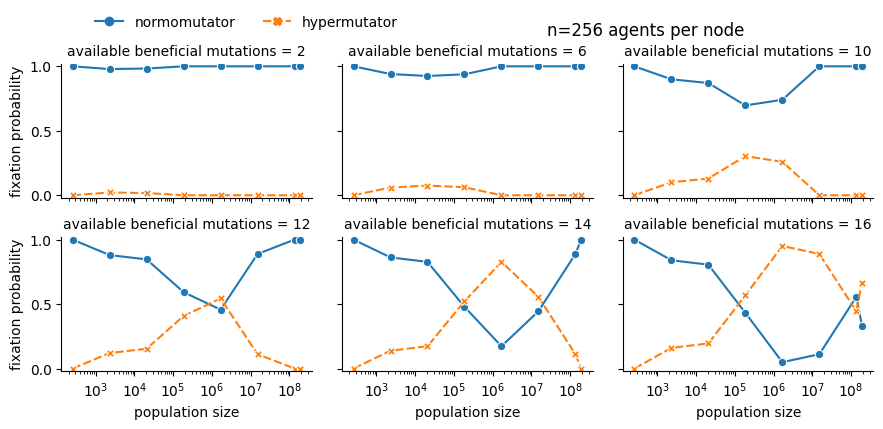

In [7]:
for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs,
        x="population size",
        y="fixation probability",
        hue="genotype",
        col="available beneficial mutations",
        style="genotype",
        col_wrap=3,
        hue_order=["normomutator", "hypermutator"],
        style_order=["normomutator", "hypermutator"],
        aspect=1.5,
        height=2,
        kind="line",
        markers=True,
        teeplot_outexclude="post",
        errorbar=errorbar,
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template="{{col_var}} = {{col_name:.0f}}")
sns.move_legend(
    teed,
    "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
    """,
    )


teeplots/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/errorbar=sd+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


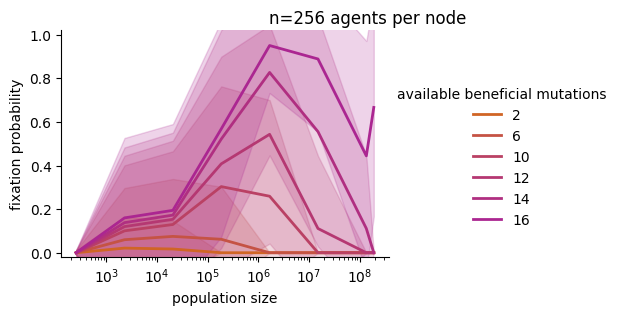

teeplots/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/errorbar=se+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


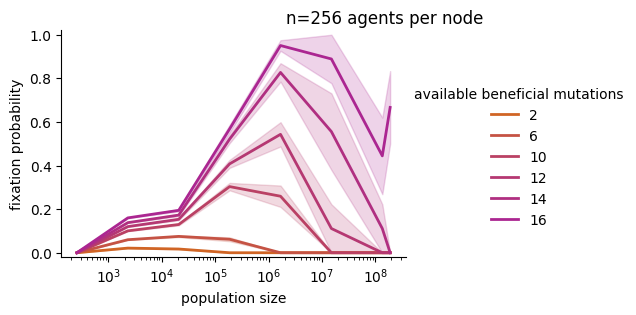

teeplots/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/errorbar=ci+hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


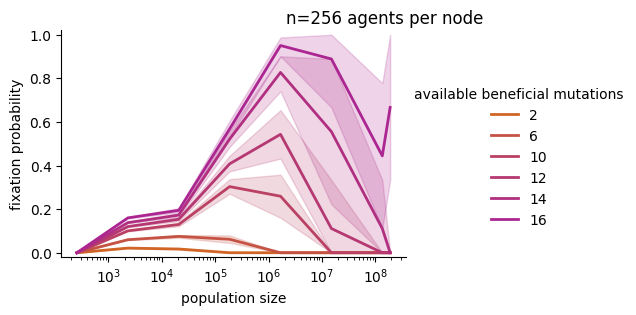

teeplots/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/hue=available-beneficial-mutations+kind=line+viz=relplot+x=population-size+y=fixation-probability+ext=.png


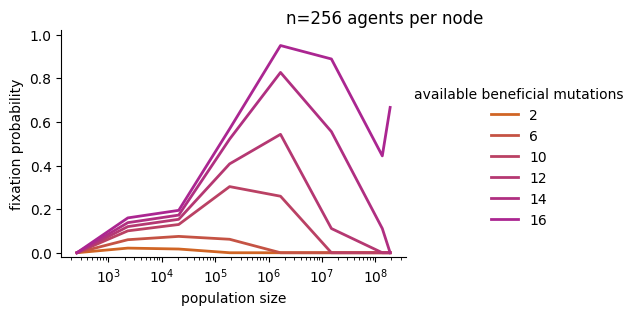

In [8]:
cmap = mpl_colors.LinearSegmentedColormap.from_list(
    "",
    ["chocolate", "darkviolet", "royalblue"],
)

for errorbar in "sd", "se", "ci", None:
    tp.tee(
        sns.relplot,
        data=dfxs[dfxs["genotype"] == "hypermutator"],
        x="population size",
        y="fixation probability",
        hue="available beneficial mutations",
        # style="available beneficial mutations",
        aspect=1.5,
        height=3,
        kind="line",
        markers=True,
        teeplot_outexclude="post",
        errorbar=errorbar,
        palette=cmap,
        linewidth=2,
        hue_norm=(1, 48),
        teeplot_postprocess=f"""
teed.set(xscale="log", ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
""",
    )


## Size Fixation Heatmap


teeplots/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.pdf
teeplots/genotype=hypermutator+index=available-beneficial-mutations+on=population-size+values=fixation-probability+viz=size-fixation-heatmap+ext=.png


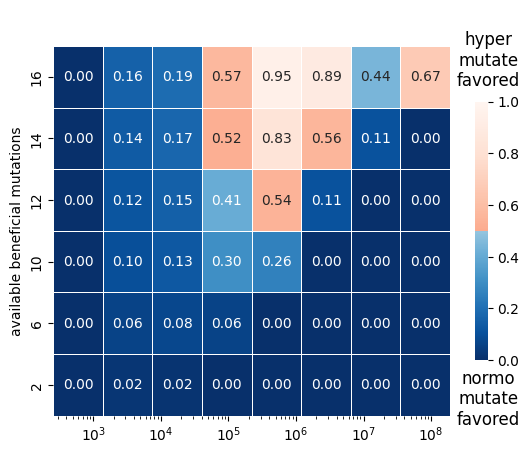

<Axes: ylabel='available beneficial mutations'>

In [9]:
tp.tee(
    size_fixation_heatmap,
    fixprobs_df=dfxs,
    genotype="hypermutator",
    index="available beneficial mutations",
    on="population size",
    values="fixation probability",
)


## Quality Check: Number Replicates Available


In [10]:
categories = (
    pl.DataFrame(dfxs)
    .group_by(
        "population size",
    )
    .first()["population size"]
    .sort()
    .cast(pl.String)
    .to_list()
)
categories


['256',
 '2304',
 '20736',
 '186624',
 '1679616',
 '15116544',
 '136048896',
 '190848000']

In [11]:
dfy = pl.DataFrame(dfxs).with_columns(
    pl.col("population size")
    .cast(pl.String)
    .cast(pl.Enum(categories))
    .alias("population size cat"),
)
display(dfy.describe()), display(dfy.head()), display(dfy.tail());


statistic,group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,population size cat
str,f64,f64,f64,f64,f64,f64,str,str
"""count""",7.174548e6,7.174656e6,7.174656e6,7.174656e6,7.174656e6,7.174656e6,"""7174656""","""7174656"""
"""null_count""",108.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",245248.692779,0.5,8.6988e18,6286.069364,10.0,0.5,null,null
"""std""",156767.708242,0.5,5.6655e18,911441.115446,4.760953,0.499985,null,null
"""min""",0.0,0.0,5.6291e16,256.0,2.0,0.0,null,null
"""25%""",106518.0,0.0,3.1203e18,256.0,6.0,0.0,null,null
"""50%""",232501.0,1.0,7.2667e18,256.0,12.0,0.90842,null,null
"""75%""",381971.0,1.0,1.5949e19,256.0,14.0,1.0,null,null
"""max""",531440.0,1.0,1.8371e19,1.90848e8,16.0,1.0,null,null


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,population size cat
f64,u8,u64,u64,i8,f64,cat,enum
313.0,1,16718381540940362211,256,2,0.0,"""hypermutator""","""256"""
207649.0,1,16718381540940362211,256,2,0.0,"""hypermutator""","""256"""
181741.0,1,16718381540940362211,256,2,0.0,"""hypermutator""","""256"""
247212.0,0,16718381540940362211,256,2,1.0,"""normomutator""","""256"""
63165.0,0,16718381540940362211,256,2,1.0,"""normomutator""","""256"""


group,trait value,replicate,population size,available beneficial mutations,fixation probability,genotype,population size cat
f64,u8,u64,u64,i8,f64,cat,enum
null,1,9356033662109735921,190848000,16,0.000092,"""hypermutator""","""190848000"""
null,0,10871965234276577008,190848000,16,0.0,"""normomutator""","""190848000"""
null,1,10871965234276577008,190848000,16,1.0,"""hypermutator""","""190848000"""
null,1,4042916190423403108,190848000,12,0.000094,"""hypermutator""","""190848000"""
null,0,4042916190423403108,190848000,12,0.999906,"""normomutator""","""190848000"""


teeplots/wse-denovo-spatial2d-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.pdf
teeplots/wse-denovo-spatial2d-traits/col=available-beneficial-mutations+hue=genotype+kind=hist+multiple=dodge+viz=displot+x=population-size-cat+ext=.png


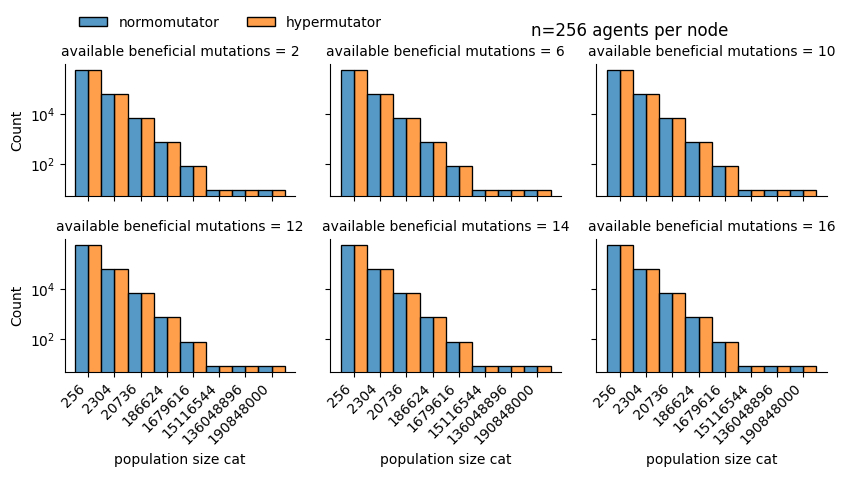

In [12]:
tp.tee(
    sns.displot,
    data=dfy.to_pandas(),
    x="population size cat",
    hue="genotype",
    col="available beneficial mutations",
    col_wrap=3,
    hue_order=["normomutator", "hypermutator"],
    aspect=1.5,
    height=2,
    kind="hist",
    multiple="dodge",
    teeplot_subdir=teeplot_subdir,
    teeplot_outexclude="post",
    teeplot_postprocess=f"""
teed.set(yscale='log')
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
for ax in teed.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
sns.move_legend(
    teed, "lower center",
    bbox_to_anchor=(0.25, 0.97),
    frameon=False,
    ncol=2,
    title=None,
)
""",
)


## Quality Check: Has Reached Fixation?


In [13]:
dfxs_ = dfxs[dfxs["genotype"] == "hypermutator"].copy().reset_index(drop=True)


In [14]:
dfxs_["unfixed"] = (dfxs_["fixation probability"] != 1.0) & (
    dfxs_["fixation probability"] > 0.001
)


teeplots/wse-denovo-spatial2d-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.pdf
teeplots/wse-denovo-spatial2d-traits/col=available-beneficial-mutations+hue=genotype+kind=scatter+style=genotype+viz=relplot+x=population-size+y=fixation-probability+ext=.png


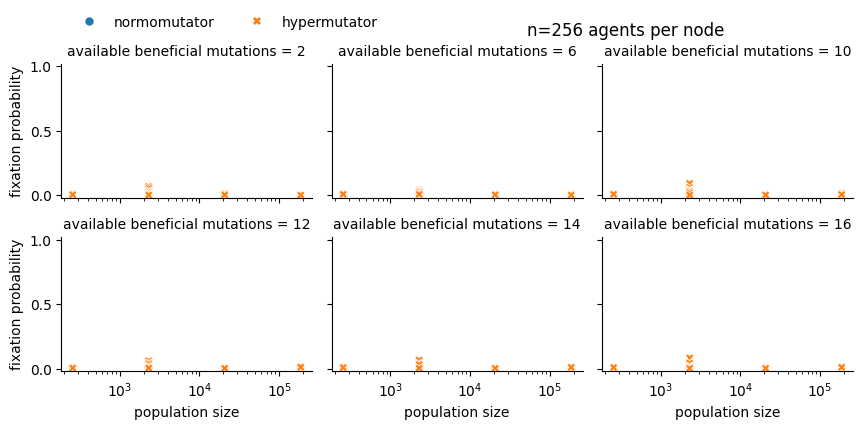

In [15]:
tp.tee(
    sns.relplot,
    data=dfxs_[dfxs_["unfixed"]],
    x="population size",
    y="fixation probability",
    hue="genotype",
    col="available beneficial mutations",
    style="genotype",
    col_wrap=3,
    hue_order=["normomutator", "hypermutator"],
    style_order=["normomutator", "hypermutator"],
    aspect=1.5,
    height=2,
    kind="scatter",
    markers=True,
    teeplot_outexclude="post",
    teeplot_subdir=teeplot_subdir,
    teeplot_postprocess=f"""
teed.set(xscale='log', ylim=(-0.02, 1.02))
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
sns.move_legend(
teed,
"lower center",
bbox_to_anchor=(0.25, 0.97),
frameon=False,
ncol=2,
title=None,
)
""",
)


teeplots/wse-denovo-spatial2d-traits/col=available-beneficial-mutations+hue=unfixed+multiple=fill+viz=displot+x=population-size+ext=.pdf
teeplots/wse-denovo-spatial2d-traits/col=available-beneficial-mutations+hue=unfixed+multiple=fill+viz=displot+x=population-size+ext=.png


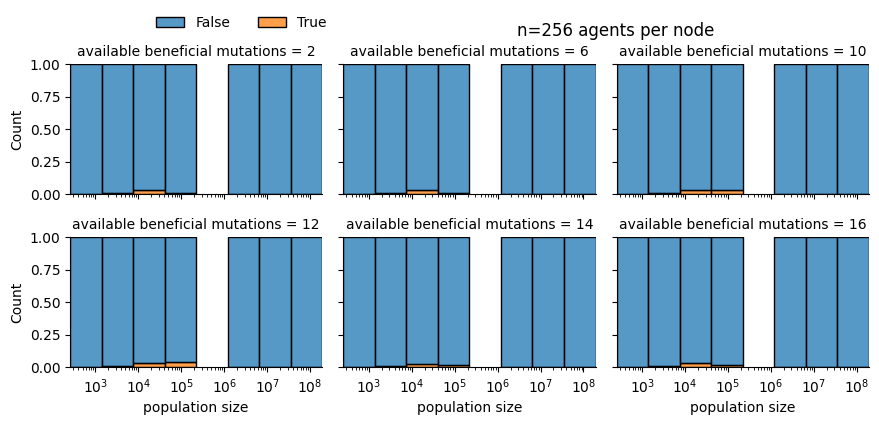

In [16]:
tp.tee(
    sns.displot,
    data=dfxs_.reset_index(drop=True),
    x="population size",
    hue="unfixed",
    col="available beneficial mutations",
    col_wrap=3,
    aspect=1.5,
    height=2,
    multiple="fill",
    bins=dfxs_["population size"].nunique(),
    log_scale=(True, False),
    teeplot_outexclude="post",
    teeplot_subdir=teeplot_subdir,
    teeplot_postprocess=f"""
teed.figure.suptitle("n={apn} agents per node", x=0.63, y=1.02)
teed.set_titles(col_template='{{col_var}} = {{col_name:.0f}}')
sns.move_legend(
teed,
"lower center",
bbox_to_anchor=(0.25, 0.97),
frameon=False,
ncol=2,
title=None,
)
""",
)
